In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#importing the dataset
data_train=pd.read_csv('CE802_P3_Data.csv')
test_df=pd.read_csv('CE802_P3_Test.csv')

In [3]:
test_data = test_df.iloc[:,:-1].copy()

In [4]:
count = data_train.isna().sum()
count

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   object 
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   int64  
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   int64  
 21  F22     1500 non-null   float64
 22  

In [6]:
dummies = data_train[['F6','F10']]
dummies = pd.get_dummies(data = dummies, drop_first = True)
new_data = pd.concat([data_train,dummies],axis=1)
new_data = new_data.drop(['F6'], axis=1)
new_data = new_data.drop(['F10'], axis=1)

In [7]:
new_data

F1       F2      F3      F4        F5       F7       F8     F9  \
0     5602.44   830.44 -206.39  155.40 -17610.98  1756.56  1287.64 -47.26   
1     3692.22  1052.24 -217.92    5.22 -20193.62  2246.56  2695.66 -65.96   
2     3939.39   853.77 -209.88    2.61 -15247.10  2464.97  1975.96 -60.66   
3     4727.82   754.45 -318.92   39.30 -11792.16  1229.09  2007.94 -39.16   
4     2649.75   735.06 -264.47    1.32 -24217.70  2294.62  1639.02 -65.66   
...       ...      ...     ...     ...       ...      ...      ...    ...   
1495  5365.59   755.72 -227.47    2.43 -14734.74  2013.40  1266.16 -50.08   
1496  5928.99  1028.52 -212.01  146.73 -21216.96  1795.27   960.66 -55.34   
1497  4204.50  1191.44 -253.51  121.14 -16907.42  3174.30   880.56 -41.56   
1498  4822.50   302.15 -185.43    7.08 -12444.10  2024.18  1098.70 -47.50   
1499  3909.90   810.22 -254.40    0.87 -21535.38  2161.25  2574.16 -33.64   

        F11       F12  ...     F35    F36   Target  F6_Rest  F6_UK  F6_USA  \
0     22.63 -18753.50  ... -319.32  38.34   -42.05        1      0       0   
1     22.86 -30177.12  ... -251.67  53.37   396.38        0      0       1   
2     20.43 -18686.82  ... -167.73  56.94   -13.75        0      0       1   
3     17.87 -19176.78  ... -120.30  54.84  3668.71        0      0       1   
4     18.32 -24578.12  ... -317.40  68.01  -151.98        1      0       0   
...     ...       ...  ...     ...    ...      ...      ...    ...     ...   
1495  17.87 -25276.38  ... -270.33  52.35  2535.19        0      0       0   
1496  18.49 -26856.64  ... -209.85  68.55  2738.03        0      0       0   
1497  17.48 -20056.34  ... -213.39  47.70  3818.24        0      0       1   
1498  22.71 -18921.74  ... -200.91  56.28   595.52        1      0       0   
1499  17.61 -14108.10  ... -350.43  61.86    55.11        0      0       1   

      F10_Low  F10_Medium  F10_Very high  F10_Very low  
0           0           0              0             1  
1           0           0              0             0  
2           0           1              0             0  
3           1           0              0             0  
4           0           0              0             1  
...       ...         ...            ...           ...  
1495        0           1              0             0  
1496        0           0              1             0  
1497        0           0              1             0  
1498        0           0              0             1  
1499        1           0              0             0  

[1500 rows x 42 columns]

In [8]:
x_data_train = new_data.drop(columns = 'Target',axis =1)
y_data_train = new_data['Target']

In [9]:
# data normalisation
standara_scalar = preprocessing.MinMaxScaler(feature_range=(0, 2))
x_norm_imp = standara_scalar.fit_transform(x_data_train)
x_norm_imp = pd.DataFrame(x_norm_imp)

# Splitting dataset

In [10]:
x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_norm_imp,y_data_train, test_size=0.3, random_state=20)

In [11]:
#data distribution and visualisation
num_value=y_data_train.value_counts()
print(num_value)

 319.81     2
 73.19      2
-377.46     1
 1821.85    1
 509.89     1
           ..
-134.30     1
 247.02     1
-39.38      1
-117.29     1
-50.16      1
Name: Target, Length: 1048, dtype: int64


In [12]:
#correlation matrix
corr_matrix = x_data_train.corr()
print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.012274  0.025459  0.018085  0.040338  0.030157 -0.048474   
1   0.012274  1.000000 -0.040935 -0.016934  0.057698  0.042832  0.000180   
2   0.025459 -0.040935  1.000000 -0.021433 -0.010806 -0.027205  0.007982   
3   0.018085 -0.016934 -0.021433  1.000000  0.001904 -0.014494 -0.054350   
4   0.040338  0.057698 -0.010806  0.001904  1.000000  0.009274 -0.013669   
5   0.030157  0.042832 -0.027205 -0.014494  0.009274  1.000000 -0.014344   
6  -0.048474  0.000180  0.007982 -0.054350 -0.013669 -0.014344  1.000000   
7   0.014513  0.039347  0.001825 -0.000591  0.022859 -0.008593 -0.017786   
8  -0.007286 -0.021641  0.018136 -0.009334  0.062873 -0.016367  0.019129   
9   0.044477  0.035453 -0.061387  0.017579  0.008479 -0.004070 -0.018362   
10  0.018026  0.042837 -0.004952 -0.028542  0.035568  0.006443  0.034730   
11  0.025506  0.044792 -0.003320  0.002967 -0.055946 -0.022829 -0.049670   
12 -0.012132

<AxesSubplot:title={'center':'Corealation Matrix'}>

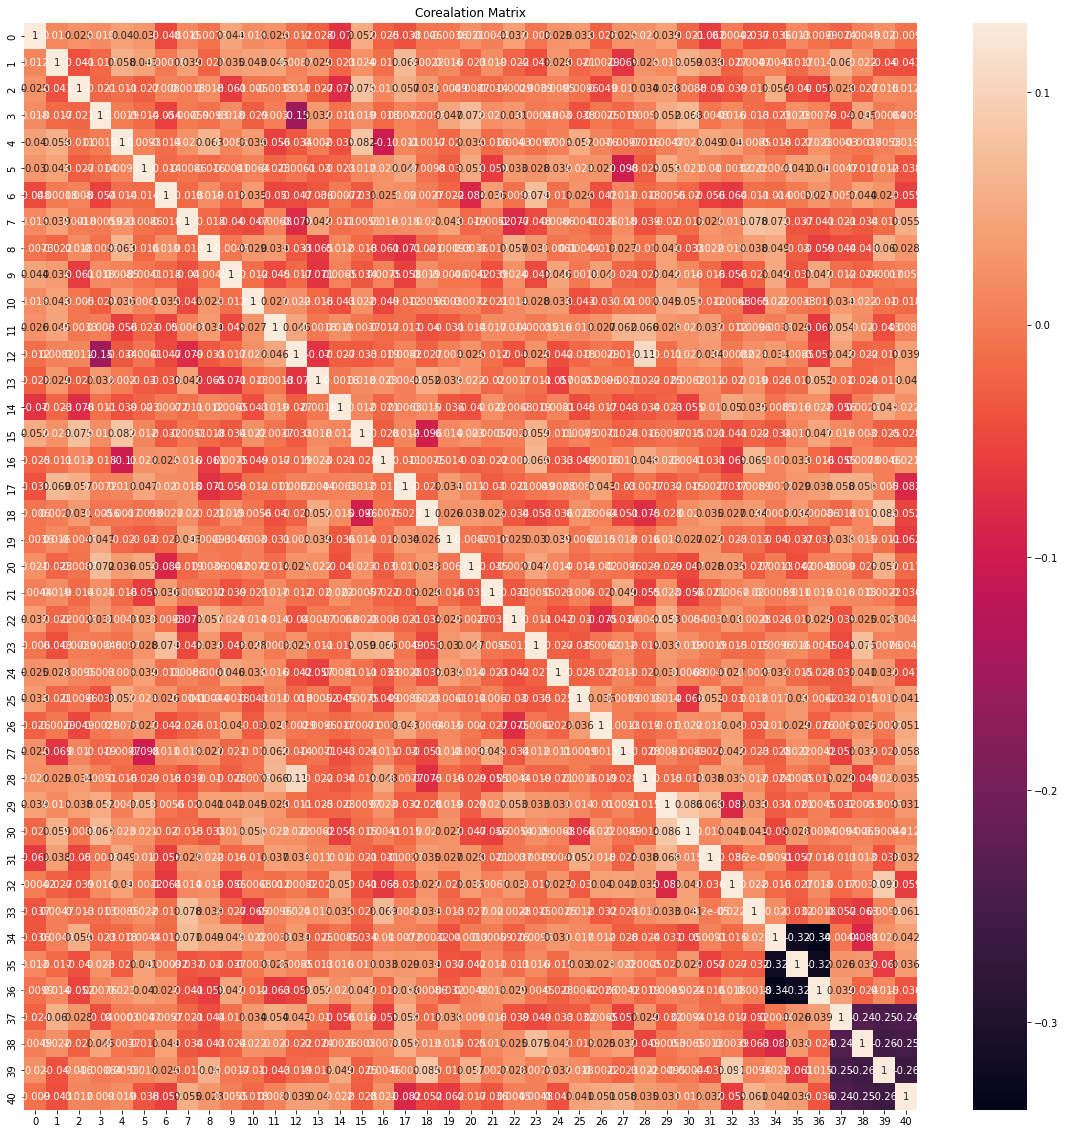

In [13]:
#heat map for corelation matrix
plt.subplots(figsize = (20,20))
plt.title('Corealation Matrix')
sns.heatmap(corr_matrix,vmax = 0.13,annot=True)

In [14]:
corr_col = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > .7 :
            col_n = corr_matrix[i]
            corr_col.add(col_n)
print(corr_col)

set()


<AxesSubplot:>

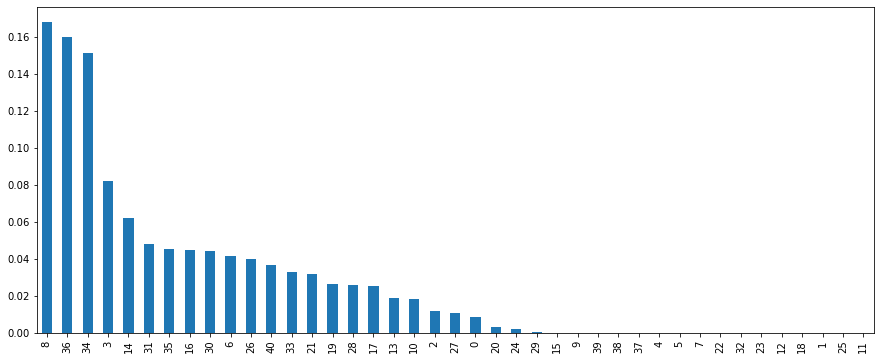

In [15]:
#checking the most important features
info = mutual_info_regression(x_data_train,y_data_train)
info
info = pd.Series(info)
info.index = x_data_train.columns
info.sort_values(ascending = False).plot.bar(figsize = (15,6))

In [16]:
#selecting the best features
feature_selection = SelectPercentile(mutual_info_regression ,percentile=60)
feature_selection.fit(x_data_train,y_data_train)
x_data_train.columns[feature_selection.get_support()]
feature_selection_train = x_data_train[x_data_train.columns[feature_selection.get_support()]]
feature_selection_test = x_data_test[x_data_test.columns[feature_selection.get_support()]]
Compare_score = {}

# Linear Regression

In [17]:
l_regression = LinearRegression()
l_regression.fit(feature_selection_train,y_data_train) 

LinearRegression()

In [18]:
y_predictor = l_regression.predict(feature_selection_test) 
y_predictor

array([-9.70565669e+00,  2.32821744e+03,  1.04200506e+03,  1.78103752e+03,
        1.21626862e+03,  1.02267349e+03,  5.98727109e+02, -3.15075907e+01,
        2.33005130e+03, -1.42586167e+01,  1.58304684e+03, -8.50509068e+02,
       -2.35268160e+02,  1.21734104e+03,  1.04802506e+03,  1.43166849e+03,
        1.49838569e+03,  1.54322552e+01,  2.22016077e+03,  1.81674898e+03,
        1.11513934e+03,  6.01509694e+02,  2.09891801e+03,  2.47099292e+03,
        5.87640481e+02,  1.19052536e+03,  4.22308078e+01,  1.91873084e+01,
        6.93147946e+02, -6.43383740e+02,  2.80522299e+02,  6.20838141e+01,
       -4.59411853e+02, -8.95600863e+02,  1.07614414e+03, -4.72726636e+01,
        2.28929378e+01,  9.13692922e+02,  1.13474704e+03,  1.99801008e+03,
        2.24826896e+02,  1.67098717e+02,  7.41728841e+02,  1.07266214e+03,
        1.71917276e+03,  1.35649802e+03,  1.49455749e+03,  2.96345660e+03,
        1.12482248e+03,  1.33367091e+03,  1.00605556e+03,  1.53902571e+03,
        5.84575622e+02,  

In [19]:
r2_score(y_data_test,y_predictor)

0.6180840206652894

In [20]:
print("Evaluation of Model: ")
print("Mean Absolute error (MAE): {}".format(mae(y_data_test,y_predictor)))
print("Mean squared error (MSE): {}".format(mse(y_data_test,y_predictor)))
print("Root mean squared error (RMSE) : {}".format(np.sqrt(mse(y_data_test,y_predictor))))

Evaluation of Model: 
Mean Absolute error (MAE): 603.4275968428336
Mean squared error (MSE): 565994.9346062235
Root mean squared error (RMSE) : 752.3263484726715


# Hyper parameter tuning

In [21]:
grid_params = { 'normalize' : [True,False],
             'fit_intercept':[True,False],
             'copy_X':[True,False]}
linear_grid_search = GridSearchCV(l_regression,grid_params,cv=5)
linear_grid_search.fit(feature_selection_train, y_data_train)
print('Best Parameters = ', linear_grid_search.best_params_)
print('Best Score = ', linear_grid_search.best_score_)
predictions = linear_grid_search.best_estimator_.predict(feature_selection_test)
fig = px.scatter(y_data_test, predictions, trendline='ols')
fig.show()
print("---Model evaluation---")
print("Mean Absolute error (MAE): {}".format(mae(y_data_test, predictions)))
print("Mean squared error (MSE): {}".format(mse(y_data_test, predictions)))
print("Root mean squared error (RMSE) : {}".format(np.sqrt(mse(y_data_test, predictions))))

Best Parameters =  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best Score =  0.6029336833921383


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

---Model evaluation---
Mean Absolute error (MAE): 603.4275968428335
Mean squared error (MSE): 565994.9346062236
Root mean squared error (RMSE) : 752.3263484726715


# Random Forest Regression

In [22]:
random_forest = RandomForestRegressor(n_estimators =20, random_state = 20)
random_forest.fit(feature_selection_train, y_data_train)
y_predictor = random_forest.predict(feature_selection_test)
print("Evaluation of Model: ")
print("Mean Absolute error (MAE): {}".format(mae(y_data_test,y_predictor)))
print("Mean squared error (MSE): {}".format(mse(y_data_test,y_predictor)))
print("Root mean squared error (RMSE) : {}".format(np.sqrt(mse(y_data_test,y_predictor))))

Evaluation of Model: 
Mean Absolute error (MAE): 577.8821788888889
Mean squared error (MSE): 561436.0640681873
Root mean squared error (RMSE) : 749.2903736657687


# Hyper parameter tuning

In [23]:
grid_params = { 
          'n_estimators': [50,75,100,125,150],
          'max_depth': [2,4,6,8,10],             
          'max_features': ['auto', 'sqrt'],  
          'min_samples_leaf': [1,2,3,4,5,6],           
          'min_samples_split' : [0.01,2,5,10],     
         }
random_forest_grid = GridSearchCV(estimator=random_forest, param_grid=grid_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
random_forest_grid.fit(feature_selection_train, y_data_train)
predict = random_forest_grid.best_estimator_.predict(feature_selection_test)
fig = px.scatter(y_data_test, predict, trendline='ols')
fig.show()
print("Evaluation of Model: ")
print("Mean Absolute error (MAE): {}".format(mae(y_data_test,predict)))
print("Mean squared error (MSE): {}".format(mse(y_data_test,predict)))
print("Root mean squared error (RMSE) : {}".format(np.sqrt(mse(y_data_test,predict))))

Evaluation of Model: 
Mean Absolute error (MAE): 553.9510200129179
Mean squared error (MSE): 529236.1658590687
Root mean squared error (RMSE) : 727.4861963357578


# K-Nearest Neighbors Regressor 

In [24]:
k_reg = KNeighborsRegressor(n_neighbors=3)
k_reg.fit(feature_selection_train,y_data_train)
predictions = k_reg.predict(feature_selection_test)

In [25]:
fig = px.scatter(y_data_test, predictions, trendline='ols')
fig.show()
print("Evaluation of Model: ")
print("Mean Absolute error (MAE): {}".format(mae(y_data_test,predictions)))
print("Mean squared error (MSE): {}".format(mse(y_data_test,predictions)))
print("Root mean squared error (RMSE) : {}".format(np.sqrt(mse(y_data_test,predictions))))

Evaluation of Model: 
Mean Absolute error (MAE): 773.2495851851851
Mean squared error (MSE): 1022052.9512940741
Root mean squared error (RMSE) : 1010.9663452826084


In [26]:
grid_params = { 
          'n_neighbors': [2,4,6,8,10,12,14,16], 
    'weights': ['uniform', 'distance'],
    'p': [1,2]     
         }
knn_grid = GridSearchCV(estimator=k_reg, param_grid=grid_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
knn_grid.fit(feature_selection_train, y_data_train)
predict = knn_grid.best_estimator_.predict(feature_selection_test)
fig = px.scatter(y_data_test, predict, trendline='ols')
fig.show()
print("Evaluation of Model: ")
print("Mean Absolute error (MAE): {}".format(mae(y_data_test,predict)))
print("Mean squared error (MSE): {}".format(mse(y_data_test,predict)))
print("Root mean squared error (RMSE) : {}".format(np.sqrt(mse(y_data_test,predict))))

Evaluation of Model: 
Mean Absolute error (MAE): 732.1441978944789
Mean squared error (MSE): 854059.5487555987
Root mean squared error (RMSE) : 924.1534227365057


# Testing data

In [27]:
count = test_data.isna().sum()
count

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
F29    0
F30    0
F31    0
F32    0
F33    0
F34    0
F35    0
F36    0
dtype: int64

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   object 
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   int64  
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   int64  
 21  F22     1500 non-null   float64
 22  

In [29]:
dummies = test_data[['F6','F10']]
dummies = pd.get_dummies(data = dummies, drop_first = True)
new_data = pd.concat([test_data,dummies],axis=1)
new_data = new_data.drop(['F6'], axis=1)
new_data = new_data.drop(['F10'], axis=1)

In [30]:
# data normalisation
standara_scalar = preprocessing.MinMaxScaler(feature_range=(0, 2))
x_norm_imp = standara_scalar.fit_transform(new_data)
x_norm_imp = pd.DataFrame(x_norm_imp)

In [31]:
feature_selection_test = x_norm_imp[x_norm_imp.columns[feature_selection.get_support()]]

In [32]:
new_test_prediction  = random_forest_grid.best_estimator_.predict(feature_selection_test)

In [33]:
new_test_prediction

array([ 781.84570447, 2853.06277517, 1965.72989661, ...,  795.28394149,
       2125.04131802,  633.02774985])

In [34]:
test_df.iloc[:,-1]=new_test_prediction

In [35]:
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

In [36]:
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])